# Data Analytics Final Assignment

Michael Krakovsky 10134030 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

---
## 1. Load Dataset & Train/Test Split

In [3]:
df_censusDataSet = pd.read_csv('ispcustomerchurn_Altered.csv')    #load data 

## 2. Feature Preprocessing & Selection

In [4]:
#df_censusDataSet = df_censusDataSet.loc[df_censusDataSet['tenure'] >= 12]
# Assign the Dataframe of features to 'features' variable 
# and the outcome of the income-class variable to 'outcome' variable
# Drop the customerID column as it has no purpose
pd.to_numeric(df_censusDataSet['tenure'])
features = df_censusDataSet.drop(['Churn', 'customerID'], 1)    
# 1 assigned to people who churn and 0 to those who do not
outcome = pd.get_dummies(df_censusDataSet['Churn'], drop_first=True)

In [5]:
# We will now attempt to dummy categoriacal variables
# First we view how many different categories each set contains
for colName in features.columns:
    if features[colName].dtypes == 'object':
        uniqueCount = len(features[colName].unique())
        #print("Name of Feature '{colName}' contains {uniqueCount} different categories.".format(
            #colName=colName, uniqueCount=uniqueCount))

In [6]:
# Create a dummy function that dropes category you wish to convert to dummy variabels
def transferToDummy(df, dummyList):
    for i in dummyList:
        dummies = pd.get_dummies(df[i], prefix=i, dummy_na=False)
        df = df.drop(i, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

# Create the list of categories to include
dummyList = ['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'PhoneService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Convert the indicated categories to dummy variables
features = transferToDummy(features, dummyList)

In [7]:
# Check the number of data that was missing --> There are no missing values
features.isnull().sum().sort_values(ascending=False).head()

PaymentMethod_Mailed check            0
OnlineBackup_No                       0
OnlineSecurity_No internet service    0
OnlineSecurity_No                     0
PhoneService_Yes                      0
dtype: int64

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(features, outcome, train_size=0.8, random_state=1)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=10)

selected_features = select.fit(xTrain, yTrain)
indices_selected = selected_features.get_support(indices=True)
colname_selected = [features.columns[i] for i in indices_selected]

print(colname_selected)

['tenure', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(xTrain, yTrain)

# Create a list of feature names
feat_labels = [i for i in xTrain]

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [11]:
sortTup = sorted(zip(feat_labels, clf.feature_importances_), key=lambda tup: tup[1])
print(sortTup[-10:])

[('OnlineBackup_No', 0.017968998677310298), ('SeniorCitizen', 0.019343998656630536), ('TechSupport_No', 0.023435914182304802), ('InternetService_Fiber optic', 0.024666234994613657), ('PaymentMethod_Electronic check', 0.027743208173419985), ('OnlineSecurity_No', 0.029456545785373128), ('Contract_Month-to-month', 0.055368282368868448), ('MonthlyCharges', 0.1378523045779394), ('tenure', 0.14132654716820794), ('TotalCharges', 0.16178273027911697)]


---
## 4. Model Training

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [13]:
# 1. Creating a K Nearest Neighbors
def createKNearest(x_Train, x_Test, y_Train, y_Test):
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(x_Train, y_Train)
    accuracy = clf.score(x_Test, y_Test)
    print("The accuracy of K-Nearest is: "+ str(accuracy))
    return clf

In [14]:
# 2. Creating a Decision Tree
def decisionTree(x_Train, x_Test, y_Train, y_Test):
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(x_Train, y_Train)
    print("The accuracy of the Decision Tree is: " + str(tree.score(x_Test, y_Test)))
    return tree

In [15]:
# 3. Creating a Logistic Regression
def logisticReg(x_Train, x_Test, y_Train, y_Test):
    logitReg = LogisticRegression()
    logitReg.fit(x_Train, y_Train)
    print("The accuracy of Logistical Regression is: " + str(logitReg.score(x_Test, y_Test)))
    return logitReg

In [16]:
# 4. Create a Naive Bayes
def naiveBayes(x_Train, x_Test, y_Train, y_Test):
    bayes = GaussianNB()
    bayes.fit(x_Train, y_Train)
    print("The accuracy of Naive-Bayes is: " + str(bayes.score(x_Test, y_Test)))
    return bayes

In [29]:
# 5. Create a random forest classifier
def randForestClass(x_Train, x_Test, y_Train, y_Test):
    randomF = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
    randomF.fit(x_Train, y_Train)
    print("The accuracy of Random Forest is: " + str(randomF.score(x_Test, y_Test)))
    return randomF

In [30]:
# 6. Create your MLPClassifier
def mlpClassifier(x_Train, x_Test, y_Train, y_Test):
    neuralNetwork = MLPClassifier(hidden_layer_sizes=(100, ), solver='adam', alpha=10**(-5))
    neuralNetwork.fit(x_Train, y_Train)
    print("The accuracy of MLPClassifier is: " + str(neuralNetwork.score(x_Test, y_Test))) 
    return neuralNetwork

In [31]:
# 7. Create a Vote Classifier for all
def voteClass(x_Train, x_Test, y_Train, y_Test, logitReg, randomF, clf, tree,
             bayes, neuralNetwork):
    vc = VotingClassifier(voting="soft", estimators=[('lr', logitReg), ('rf', randomF),
                                      ('gnb', bayes), ('kn', clf), ('dT', tree), 
                                       ('nNet', neuralNetwork)])
    vc.fit(x_Train, y_Train)
    print("The accuracy of Vote Classifier is: " + str(vc.score(x_Test, y_Test)))
    return vc

In [32]:
# Run all the models and organise the results
# Combine the best features from methods used above
mostImportantFeat = []
for feature in sortTup[-10:]:
    mostImportantFeat.append(feature[0])
for feature in colname_selected:
    if (feature in mostImportantFeat) == False:
        mostImportantFeat.append(feature)

# Drop the unwanted features
xTrainSelected = xTrain[mostImportantFeat]
xTestSelected = xTest[mostImportantFeat]
new_feat_labels = [i for i in xTrainSelected]
#selectedFeatures = ['tenure', 'InternetService_Fiber optic', 'OnlineSecurity_No', 
 #                   'OnlineBackup_No', 'Contract_Two year', 'PaymentMethod_Electronic check', 
  #                  'TechSupport_No', 'TotalCharges', 
   #                 'MonthlyCharges', 'SeniorCitizen']
#xTrainSelected = xTrain[selectedFeatures]
#xTestSelected = xTest[selectedFeatures]
clf = createKNearest(xTrainSelected, xTestSelected, yTrain, yTest)
tree = decisionTree(xTrainSelected, xTestSelected, yTrain, yTest)
logist = logisticReg(xTrainSelected, xTestSelected, yTrain, yTest)
naiBay = naiveBayes(xTrainSelected, xTestSelected, yTrain, yTest)
randFor = randForestClass(xTrainSelected, xTestSelected, yTrain, yTest)
#net = mlpClassifier(xTrainSelected, xTestSelected, yTrain, yTest)
#vote = voteClass(xTrainSelected, xTestSelected, yTrain, yTest, logist, randFor,
#         clf, tree, naiBay, net)

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The accuracy of K-Nearest is: 0.762615493959
The accuracy of the Decision Tree is: 0.780383795309
The accuracy of Logistical Regression is: 0.791044776119
The accuracy of Naive-Bayes is: 0.71855010661
The accuracy of Random Forest is: 0.793887704335


In [21]:
coeff = np.exp(logist.coef_)
for ind, val in enumerate(new_feat_labels):
    print(str(val) + "                 " + str(coeff[0][ind]))

OnlineBackup_No                 1.10749782318
SeniorCitizen                 1.33950818929
TechSupport_No                 1.25838604928
InternetService_Fiber optic                 2.29927298392
PaymentMethod_Electronic check                 1.47389883567
OnlineSecurity_No                 1.42165187361
Contract_Month-to-month                 1.42153211132
MonthlyCharges                 0.99762412002
tenure                 0.928344070545
TotalCharges                 1.00043120646
DeviceProtection_No                 0.827129054907
StreamingMovies_No internet service                 0.557147353192
Contract_Two year                 0.60214087831


In [22]:
bag = BaggingClassifier(base_estimator=logist, n_estimators=1000)
bag.fit(xTrainSelected, yTrain)
print("The accuracy of Bagging on Logit is: " + str(bag.score(xTestSelected, yTest)))

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of Bagging on Logit is: 0.790334044065


## 5. Model Validation & Selection

You are expected to validate your models using ROC Curves and Lift Curves.

For convenience, the following functions allow you to plot these.

In [24]:
from sklearn.metrics import classification_report
y_pred = logist.predict(xTestSelected)
predicted = clf.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
#roc_plot(yTest, predictedProbs, "K Nearest Neighbors")
#lift_plot(yTest, predictedProbs, "K Nearest Neighbors")
print(classification_report(yTest, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1024
          1       0.65      0.50      0.56       383

avg / total       0.78      0.79      0.78      1407



In [25]:
predicted = tree.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Decision Tree")
lift_plot(yTest, predictedProbs, "Decision Tree")

NameError: name 'roc_plot' is not defined

In [26]:
predicted = logist.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Logistic Regression ")
lift_plot(yTest, predictedProbs, "Logistic Regression ")

NameError: name 'roc_plot' is not defined

In [27]:
predicted = naiBay.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Naïve Bayes ")
lift_plot(yTest, predictedProbs, "Naïve Bayes ")

NameError: name 'roc_plot' is not defined

In [33]:
predicted = randFor.predict_proba(xTestSelected)
#predictedProbs = [i[1] for i in predicted]
#roc_plot(yTest, predictedProbs, "Random Forest ")
#lift_plot(yTest, predictedProbs, "Random Forest ")
y_pred = logist.predict(xTestSelected)
print(classification_report(yTest, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1024
          1       0.65      0.50      0.56       383

avg / total       0.78      0.79      0.78      1407



In [34]:
predicted = vote.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Vote Classifier")
lift_plot(yTest, predictedProbs, "Vote Classifier")

NameError: name 'vote' is not defined

In [35]:
predicted = net.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Neural Net")
lift_plot(yTest, predictedProbs, "Neural Net")

NameError: name 'net' is not defined

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def roc_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    plt.title(model_name+'Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

def lift_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: Cummulative Gain Chart and Lift Curve
    """
    count = actual.count()
    totalSum = actual.sum()
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr=(tpr*totalSum[0]+fpr*(count[0]-totalSum[0]))/count[0]
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name+'Lift Curve')

---
### Questions
1. Reccomend a classifier using your intepretation of the ROC and Lift curves.

1. Logistic Regression is our recommended classifier. Looking first at the ROC curves, Logistic Regression has the largest Area Under Curve (0.90), slightly more than Naive Bayes (0.89), which performed second best. Furthermore, Logistic Regression clearly provides more lift than the other classifiers at lower targeting thresholds, although its lift curve becomes very similar to those of KNN and Naive Bayes above a % targeted of ~0.60. However, Logistic Regression’s clear advantage at lower thresholds, combined with its superior ROC curve, make it the optimal choice. 

---
## 6. Model Use

In [125]:
def profit_curve(actual, probability):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    
    Outputs: 
    - cumulative percentage of customers targeted (1 dimensional array)
    - cumulative profit from targeting (1 dimensional array)
    - optimal percentage of targeted customers to maximize profits (number)
    - maximum profit acheivable (number)
    
    Example Call:
    >>> cum_percent, cum_profit, optimal_targeting, max_profit = profit_curve(actual, probability)
    """
    
    TP = 50
    FP = -5

    df = pd.DataFrame([actual,probability], index=['a','p']).T.sort_values('p',ascending=False)
    for i in range(0, len(df['a'])):     # I was getting single element arrays
        if df['a'][i] == [1]:           #Therefore I converted the arrays to ints
            df['a'][i] = 1
        else:
            df['a'][i] = 0
    df['profit'] = np.where(df['a'] == 1, TP, FP)
    df['cum_profit'] = df['profit'].cumsum()
    df['counter'] = 1
    df['cum_percent'] = df['counter'].cumsum() / len(df['counter'])

    max_index = np.argmax(df['cum_profit'])
    max_profit = df['cum_profit'][max_index]
    optimal_targeting = df['cum_percent'][max_index]
    
    return df['cum_percent'], df['cum_profit'], optimal_targeting, max_profit

In [126]:
# Find values of logistical regression
predicted = logist.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
yTestToList = yTest.values.tolist()
logCum_percent, logCum_profit, logOptimal_targeting, logMax_profit = profit_curve(yTestToList, predictedProbs)

In [127]:
# Find values of Random Forest
predicted = randFor.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
yTestToList = yTest.values.tolist()
NaiCum_percent, NaiCum_profit, NaiOptimal_targeting, NaiMax_profit = profit_curve(yTestToList, predictedProbs)

In [128]:
# Profit curve for a random selection
predictedProbs = [0.5 for i in range(0, 7033)]
yTestToList = yTest.values.tolist()
RanCum_percent, RanCum_profit, RanOptimal_targeting, RanMax_profit = profit_curve(yTestToList, predictedProbs)

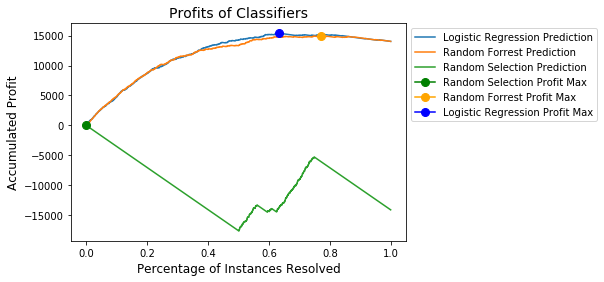

In [129]:
# Plot indicated models
plt.plot(logCum_percent, logCum_profit, label='Logistic Regression Prediction')
plt.plot(NaiCum_percent, NaiCum_profit, label='Random Forrest Prediction')
plt.plot(RanCum_percent, RanCum_profit, label='Random Selection Prediction')
# Plot max points
plt.plot(RanOptimal_targeting, RanMax_profit, marker='o', markersize=8, color="green", label='Random Selection Profit Max')
plt.plot(NaiOptimal_targeting, NaiMax_profit, marker='o', markersize=8, color="orange", label='Random Forrest Profit Max')
plt.plot(logOptimal_targeting, logMax_profit, marker='o', markersize=8, color="blue", label='Logistic Regression Profit Max')
# Plot axis
plt.ylabel('Accumulated Profit', fontsize=12)
plt.xlabel('Percentage of Instances Resolved', fontsize=12)
plt.title('Profits of Classifiers', fontsize=14)
# Plot legend and show
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [130]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

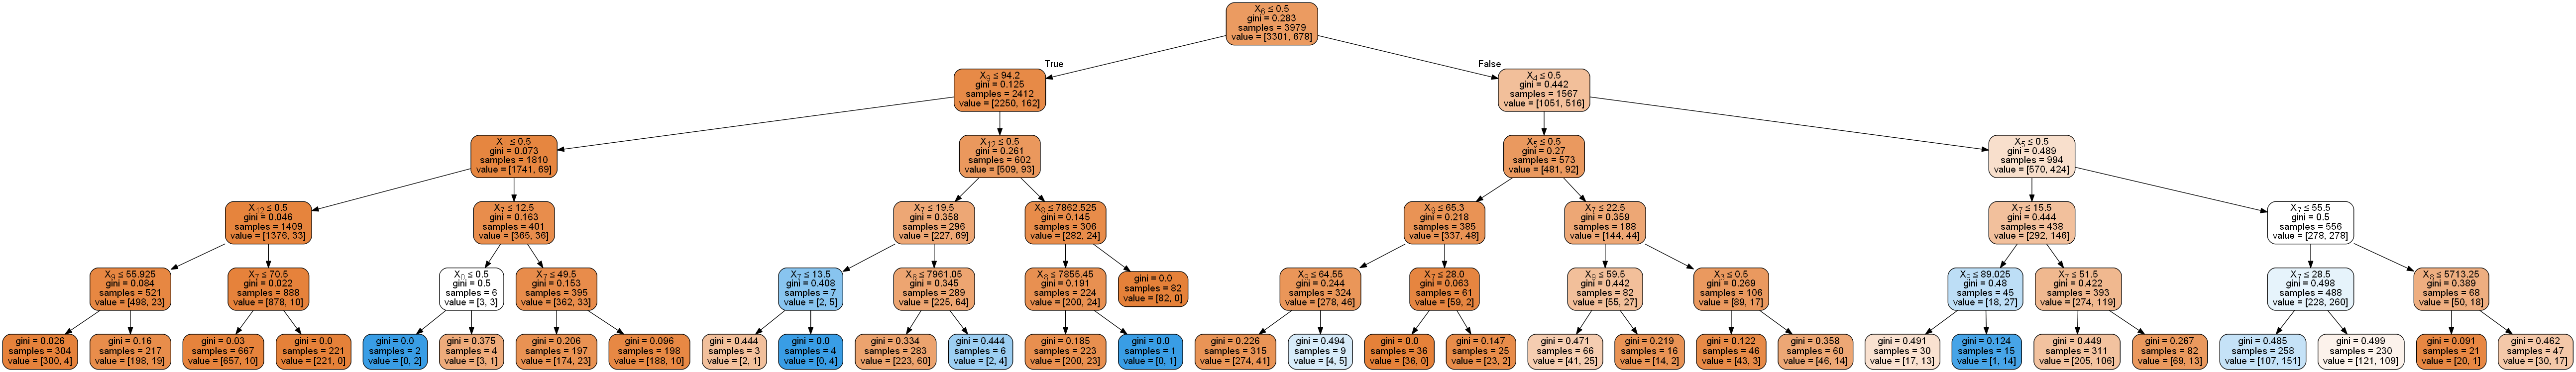

In [134]:
export_graphviz(tree, out_file=r"C:\Users\micha\Documents\Analytics & Coding\Angular Development\me.JPEG",  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [139]:
for idx, i in enumerate(xTrainSelected):
    print("Value " + str(idx) + ": " + str(i))

Value 0: OnlineBackup_No
Value 1: SeniorCitizen
Value 2: TechSupport_No
Value 3: InternetService_Fiber optic
Value 4: PaymentMethod_Electronic check
Value 5: OnlineSecurity_No
Value 6: Contract_Month-to-month
Value 7: MonthlyCharges
Value 8: tenure
Value 9: TotalCharges
Value 10: DeviceProtection_No
Value 11: StreamingMovies_No internet service
Value 12: Contract_Two year
